# Busca simples

Desenvolvimento de um buscador Simples: Booleano, TF-IDF, BM25

Tópicos abordados: Indexação, Bag-of-Words, TF-IDF, BM25

Aula 1 - [Unicamp - IA368DD: Deep Learning aplicado a sistemas de busca.](https://www.cpg.feec.unicamp.br/cpg/lista/caderno_horario_show.php?id=1779)

Autor: Marcus Vinícius Borela de Castro

[Repositório no github](https://github.com/marcusborela/deep_learning_em_buscas_unicamp)

[Link para chat de apoio com WebChatGPT](https://github.com/marcusborela/deep_learning_em_buscas_unicamp/blob/main/chat/CG%20uso%20no%20buscador%20aula%201.md)
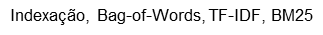

[![Open In Colab latest github version](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marcusborela/deep_learning_em_buscas_unicamp/blob/main/code/aula1_buscador_simples.ipynb) [Open In Colab latest github version]

Implementação de buscadores para o TREC-DL 2020

Este projeto tem como objetivo implementar e avaliar diferentes algoritmos de busca para o TREC-DL 2020, utilizando a biblioteca Pyserini para implementar o BM25.

Pré-requisitos

Antes de começar, é necessário instalar a biblioteca Pyserini e baixar os dados do TREC-DL 2020. Para isso, siga as instruções descritas na documentação oficial do Pyserini.

Implementação do buscador booleano/bag-of-words

Para a implementação do buscador booleano/bag-of-words, será necessário criar um índice invertido a partir dos documentos e utilizar uma estrutura de dados para armazenar a matriz de termos por documentos.

Em seguida, para cada consulta, será necessário realizar uma busca utilizando operadores booleanos ou uma representação bag-of-words. Para operadores booleanos, a busca pode ser realizada utilizando árvores de expressão booleana. Para a representação bag-of-words, pode ser utilizada uma matriz termo-documento.

Implementação do buscador com TF-IDF

Para a implementação do buscador com TF-IDF, será necessário criar um índice invertido a partir dos documentos e calcular a frequência de termos em cada documento. Em seguida, para cada consulta, será necessário calcular o peso TF-IDF de cada termo e realizar uma busca ordenando os documentos de acordo com o seu score.

Avaliação dos buscadores

Para avaliar os buscadores, será utilizado o conjunto de dados do TREC-DL 2020 e o métrica nDCG@10. Será necessário implementar um script para executar as buscas para cada um dos algoritmos implementados e calcular o nDCG@10 para cada consulta.

Considerações finais

A implementação dos buscadores deve levar em conta a eficiência na busca de milhões de documentos. Para isso, é recomendado utilizar estruturas de dados eficientes e técnicas de pré-processamento de texto para reduzir o tempo de busca. É importante lembrar que não será permitido o uso de bibliotecas como sklearn, que já implementam o BoW e TF-IDF.

# Etapa 1: Coleta de dados da TREC Collection

## Elaboração de Rotinas utilitárias

In [9]:
def mostra_dict(dicionario: dict):
    """
    Imprime informações sobre o dicionário recebido como parâmetro.

    Argumentos:
    - dicionario: um dicionário a ser impresso

    Retorna:
    - None
    """
    # obtém a primeira e última chave do dicionário
    primeiro_elemento = list(dicionario.keys())[0]
    ultimo_elemento = list(dicionario.keys())[-1]

    # imprime o tamanho do dicionário e as informações sobre seus limites
    print(f"O dicionário tem tamanho: {len(dicionario)}")
    print(f"Seus limites:\n {primeiro_elemento}:\n {dicionario[primeiro_elemento]},\n {ultimo_elemento}:\n {dicionario[ultimo_elemento]}")


In [19]:
mostra_dict(relevancia_consulta)

O dicionário tem tamanho: 76
Seus limites:
 1:
 [28, 35, 38, 42, 43, 52, 65, 76, 86, 150, 189, 192, 193, 195, 215, 269, 291, 320, 429, 465, 466, 482, 483, 510, 524, 541, 576, 582, 589, 603, 650, 680, 711, 722, 726, 783, 813, 820, 868, 869, 894, 1162, 1164, 1195, 1196, 1281],
 111:
 [328, 422, 448, 485, 503, 509]


from google.colab import drive
drive.mount('/content/drive')

# Etapa 2: Pré-processamento dos textos de documentos e consultas

In [20]:
# !pip install nltk

In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
#stemmer = SnowballStemmer('english')


In [22]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stop_words = set(stopwords.words('english'))

## Desenvolvimento do código

In [24]:
def preprocessa_texto(texto,
                      to_lower=True, 
                      remove_pontuacao=True,
                      remove_stopwords=True,
                      aplica_stemming=True,
                      aplica_lematizacao=True):
    """
    Função que realiza o pré-processamento de um texto.
    
    Parâmetros:
    texto (str): Texto a ser pré-processado
    to_lower (bool): Flag que indica se deve transformar o texto para lower case. Default: True
    remove_pontuacao (bool): Flag que indica se deve remover a pontuação do texto. Default: True
    remove_stopwords (bool): Flag que indica se deve remover as stop words do texto. Default: True
    aplica_stemming (bool): Flag que indica se deve aplicar stemming no texto. Default: True
    aplica_lematizacao (bool): Flag que indica se deve aplicar lematização no texto. Default: True
    
    Retorna:
    str: Texto pré-processado
    """
    # Transforma o texto em lower case
    if to_lower:
        texto = texto.lower()

    # Substitute line breaks for space
    texto = re.sub(r'\n', ' ', texto)

    # Remove pontuação
    if remove_pontuacao:
        texto = re.sub(r'[^\w\s]', '', texto)

    palavras = texto.split()

    # Remove stop words
    if remove_stopwords:
        palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stop_words]
        palavras = palavras_sem_stopwords

    # Aplica stemming
    if aplica_stemming:
        palavras_stemizadas = [stemmer.stem(palavra) for palavra in palavras]
        palavras = palavras_stemizadas

    # Aplica lematização
    if aplica_lematizacao:
        palavras_lematizadas = [lemmatizer.lemmatize(palavra) for palavra in palavras]
        palavras = palavras_lematizadas

    return ' '.join(palavras)


In [25]:
preprocessa_texto("This is an example of text.") 

'exampl text'

In [26]:
def preprocessa_texto_em_dict(parm_dict, 
                      to_lower=True, 
                      remove_pontuacao=True,
                      remove_stopwords=True,
                      aplica_stemming=True,
                      aplica_lematizacao=True):
  """
  Recebe um dicionário e retorna uma cópia do mesmo com os valores da chave "text" pré-processados.

  Args:
  parm_dict (dict): Dicionário com chaves de texto e valores em texto.
  to_lower (bool): Transforma o texto em caixa baixa. Padrão é True.
  remove_pontuacao (bool): Remove a pontuação do texto. Padrão é True.
  remove_stopwords (bool): Remove as palavras de parada do texto. Padrão é True.
  aplica_stemming (bool): Aplica a técnica de stemming no texto. Padrão é True.
  aplica_lematizacao (bool): Aplica a técnica de lematização no texto. Padrão é True.

  Returns:
  dict: Novo dicionário com a nova chave 'texto_prep' e seus valores pré-processados.

  new_dict = dict(parm_dict)  # cria uma cópia do dicionário
  for elemento in new_dict:
    for key in new_dict[elemento]:
      if key == "text":
          new_dict[elemento]["text_prep"] = preprocessa_texto(new_dict[elemento]["text"], to_lower=to_lower, 
                                                    remove_pontuacao=remove_pontuacao,
                                                    remove_stopwords=remove_stopwords,
                                                    aplica_stemming=aplica_stemming,
                                                    aplica_lematizacao=aplica_lematizacao)
  return new_dict
  """
  new_dict = {}
  for elemento in parm_dict:
    for key in parm_dict[elemento]:
      if key == "text":
          new_dict[elemento] = preprocessa_texto(parm_dict[elemento]["text"], to_lower=to_lower, 
                                                    remove_pontuacao=remove_pontuacao,
                                                    remove_stopwords=remove_stopwords,
                                                    aplica_stemming=aplica_stemming,
                                                    aplica_lematizacao=aplica_lematizacao)
  return new_dict

## Teste do código de pre-processamento

In [27]:
assert preprocessa_texto("This is a simple text.").split() == ['simpl', 'text']


In [28]:
assert preprocessa_texto("Hello! My name is John. Nice to meet you!").split() == ['hello', 'name', 'john', 'nice', 'meet']
assert preprocessa_texto("We are learning about Natural Language Processing.").split() == ['learn', 'natur', 'languag', 'process']
assert preprocessa_texto("The quick brown fox jumps over the lazy dog.").split() == ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']
assert preprocessa_texto("To be, or not to be: that is the question.").split() == ["question"]
assert preprocessa_texto("I'm a developer at OpenAI. I love working with AI and NLP technologies!").split() == ['im', 'develop', 'openai', 'love', 'work', 'ai', 'nlp', 'technolog']
assert preprocessa_texto("The cat is on the mat.").split() == ['cat', 'mat']
assert preprocessa_texto("An investment in knowledge pays the best interest.").split() == ['invest', 'knowledg', 'pay', 'best', 'interest']
assert preprocessa_texto("The quick brown fox jumps over the lazy dog.").split() == ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']
assert preprocessa_texto("To be, or not to be: that is the question.").split() == ["question"]
assert preprocessa_texto("I'm a developer at OpenAI. I love working with AI and NLP technologies!").split() == ['im', 'develop', 'openai', 'love', 'work', 'ai', 'nlp', 'technolog']
assert preprocessa_texto("The cat is on the mat.").split() == ['cat', 'mat']
assert preprocessa_texto("An investment in knowledge pays the best interest.").split() == ['invest', 'knowledg', 'pay', 'best', 'interest']


In [29]:
assert preprocessa_texto("Hello World!").split() == ['hello', 'world']
assert preprocessa_texto("Hello, World!!!").split() == ['hello', 'world']
assert preprocessa_texto("Hello World", remove_pontuacao=False).split() == ['hello', 'world']
assert preprocessa_texto("Hello World", remove_stopwords=False).split() == ['hello', 'world']
assert preprocessa_texto("I am running in the park", aplica_stemming=False).split() == ['running', 'park']
assert preprocessa_texto("I am running in the park", to_lower=False, remove_stopwords=False, aplica_stemming=False, aplica_lematizacao=False).split() == ['I', 'am', 'running', 'in', 'the', 'park']
assert preprocessa_texto("I am running in the park", aplica_lematizacao=False).split() == ['run', 'park']
assert preprocessa_texto("I am running in the park", to_lower=False).split() == ['i', 'run', 'park']


In [30]:
documentos[1]

{'title': '18 Editions of the Dewey Decimal Classifications',
 'author': 'Comaromi, J.P.',
 'text': "The present study is a history of the DEWEY Decimal\nClassification.  The first edition of the DDC was published\nin 1876, the eighteenth edition in 1971, and future editions\nwill continue to appear as needed.  In spite of the DDC's\nlong and healthy life, however, its full story has never\nbeen told.  There have been biographies of Dewey\nthat briefly describe his system, but this is the first\nattempt to provide a detailed history of the work that\nmore than any other has spurred the growth of\nlibrarianship in this country and abroad.",
 'reference': '1\t5\t1\n92\t1\t1\n262\t1\t1\n556\t1\t1\n1004\t1\t1\n1024\t1\t1\n1024\t1\t1'}

## Pré-processamento da coleção CISI

In [31]:
consultas_prep = preprocessa_texto_em_dict(consultas)

In [32]:
consultas_prep[1]

'problem concern make descript titl difficulti involv automat retriev articl approxim titl usual relev content articl titl'

In [33]:
list(consultas_prep.items())[:4]

[(1,
  'problem concern make descript titl difficulti involv automat retriev articl approxim titl usual relev content articl titl'),
 (2,
  'actual pertin data oppos refer entir articl retriev automat respons inform request'),
 (3, 'inform scienc give definit possibl'),
 (4, 'imag recognit method automat transform print text computerreadi form')]

Como o id do documento corresponde à posição do documento, para facilitar, considerarei uma lista de strings.

In [34]:
documentos_prep = preprocessa_texto_em_dict(documentos)

In [35]:
documentos_prep = list(documentos_prep.values())

In [36]:
documentos_prep[0]

'present studi histori dewey decim classif first edit ddc publish 1876 eighteenth edit 1971 futur edit continu appear need spite ddc long healthi life howev full stori never told biographi dewey briefli describ system first attempt provid detail histori work spur growth librarianship countri abroad'

# Etapa 3: Implementação de dois mecanismos de busca com BM25

## Desenvolvimento de um mecanismo de busca baseado em bm25 puro

Conforme site de referência:

PAIVA, Clovis.Elasticsearch: entenda a teoria por trás do mecanismo de busca textual.In: medium.com.2020; Disponível em: [https://medium.com/tentando-ser-um-unic%C3%B3rnio/elasticsearch-entenda-a-teoria-por-tr%C3%A1s-do-mecanismo-de-busca-textual-86d11bd4f69d](https://medium.com/tentando-ser-um-unic%C3%B3rnio/elasticsearch-entenda-a-teoria-por-tr%C3%A1s-do-mecanismo-de-busca-textual-86d11bd4f69d). Acesso em: 22 fev. 2023. 


In [37]:
from typing import List, Tuple

In [38]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


class BM25:

    def __init__(self, documents: list, k1=1.5, b=0.75, epson=0.25):
        """
        Inicializa um modelo BM25 com os parâmetros k1 e b definidos.

        Args:
            documents (dict): Dicionário contendo os documentos indexados por ID.
            k1 (float): Parâmetro de ajuste da frequência de termos.
            b (float): Parâmetro de ajuste do comprimento dos documentos.
        """
        self.k1 = k1
        self.b = b
        self.idf = {}
        self.avgdl = 0
        self.doc_len = {}
        self.documents = documents
        self.N = len(documents)
        self.vectorizer = TfidfVectorizer(norm=None, smooth_idf=False)

        # Constrói a matriz TF-IDF usando a biblioteca sklearn
        self.tf_idf_matrix = self.vectorizer.fit_transform(self.documents)

        # Calcula o comprimento médio dos documentos da coleção
        self._calc_avgdl()

    def _calc_avgdl(self):
        """
        Calcula o comprimento médio dos documentos da coleção.
        """
        self.avgdl = self.tf_idf_matrix.sum(axis=1).mean()

        
    def _score(self, query_tf_idf, index: int):
        """
        Calcula o escore BM25 para um documento específico em relação a uma consulta.

        Args:
            query_tf_idf: TF-IDF da consulta.
            index (int): Índice do documento.

        Returns:
            float: Escore BM25 para o documento em relação à consulta.
        """
        # print('query_tf_idf')
        # print(query_tf_idf)
        # print('self.tf_idf_matrix[index].T')
        # print(self.tf_idf_matrix[index].T)

        
        prod_query_docto = np.dot(query_tf_idf,self.tf_idf_matrix[index].T)

        # print(prod_query_docto.toarray())
        # print(prod_query_docto.toarray().item())
        prod_query_docto = prod_query_docto.toarray().item()
        # print(f"type prod_query_docto {type(prod_query_docto)}")
        val_bm25 = ((self.k1 + 1)*prod_query_docto)/(self.k1+prod_query_docto)
        return val_bm25

    def search(self, query, top_k=5):
        """
        Busca os k documentos mais relevantes para a consulta query.

        Parâmetros
        ----------
        query: str
            Consulta a ser pesquisada.
        top_k: int, opcional (default=5)
            Número de documentos mais relevantes a serem retornados.

        Retorna
        -------
        list
            Lista de tuplas contendo o id do documento e a pontuação BM25.
        """

        # Separa as palavras da consulta em uma lista de tokens
        # print(f"Query: {query}")
        # query = query.split()

        # Aplica o vetorizador na consulta
        query_tf_idf = self.vectorizer.transform([query])

        # Dicionário de pontuação de cada documento para a consulta
        scores = {ndx+1: self._score(query_tf_idf, ndx) for ndx, doc in enumerate(self.documents)}
  
        # print(f"scores[:5]  {list(scores)[:5]}")
        # Ordena os documentos por ordem decrescente de pontuação e retorna os k mais relevantes
        return sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_k]

In [39]:
mecanismo_bm25 = BM25(documentos_prep)

In [40]:
print(f"Total doctos: {mecanismo_bm25.N}\nTamanho médio: {mecanismo_bm25.avgdl}")

Total doctos: 1460
Tamanho médio: 281.56420071632516


In [41]:
print(mecanismo_bm25.vectorizer.transform([consultas_prep[1]]))

  (0, 6487)	4.548522096419013
  (0, 6161)	10.373633932200244
  (0, 5255)	2.725510083686854
  (0, 5163)	3.5155070902367176
  (0, 4847)	2.599216358362562
  (0, 3760)	3.2235966816754154
  (0, 3366)	3.9167438622353608
  (0, 1995)	4.730843653212968
  (0, 1943)	3.7218435232345457
  (0, 1642)	4.009525595686327
  (0, 1567)	3.249239112288753
  (0, 909)	3.7535922215491264
  (0, 824)	6.821988783002461
  (0, 785)	4.457550318213287


In [43]:
mecanismo_bm25.search(consultas_prep[1],top_k=10)

[(589, 2.4927852279328304),
 (722, 2.4886306108594023),
 (429, 2.488317120985585),
 (820, 2.488261730465691),
 (65, 2.4867478536555807),
 (1090, 2.485626364202991),
 (1091, 2.48513987052277),
 (603, 2.483178290444875),
 (17, 2.482872891017683),
 (813, 2.4819771674183744)]

## Desenvolvimento de um mecanismo de busca baseado em bm25 com acréscimo de penalização para o tamanho dos documentos

Usando library rank-bm25.BM25Okapi

Nessa library python, há um ajuste que considera o tamanho do documento, como bem explicado na referência citada no início desta seção.

In [44]:
!pip install rank-bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from rank_bm25 import BM25Okapi


In [176]:
class BM25_Penaliza_Tamanho_Docto:
    def __init__(self, documentos):
        """
        Inicializa o indexador.

        Args:
            documentos (list): Lista com as informações dos documentos pré-processados.
        """
        self.documentos = documentos
        self.index = BM25Okapi(documentos)

    def search(self, consulta, top_k=10):
        """
        Realiza a busca BM25 para a consulta.

        Args:
            consulta (str): Consulta a ser buscada.
            top_k (int): Número máximo de documentos a serem retornados. Padrão é 10.

        Returns:
            list: Lista com os índices dos documentos mais relevantes para a consulta, ordenados por relevância decrescente.
        """
      
        scores = self.index.get_scores(consulta)
        # print(scores)
        sorted_indexes = np.argsort(scores)[::-1]
        # print(sorted_indexes)

        # Get the top values and their indexes in a pair list
        return [(i, scores[i]) for i in sorted_indexes[:top_k]]



In [177]:
mecanismo_bm25_penaliza_tamanho = BM25_Penaliza_Tamanho_Docto(documentos_prep)

In [178]:
mecanismo_bm25_penaliza_tamanho.search(consultas_prep[1], top_k=10)

[(1283, -112.62650106298177),
 (1295, -117.00449081753162),
 (1099, -131.78342390793745),
 (1287, -135.45310000378092),
 (826, -145.30485984149763),
 (1085, -146.20343976246576),
 (1281, -146.46291901278508),
 (1319, -147.46108434334448),
 (1301, -148.7393105811567),
 (1311, -148.88804046312976)]

In [139]:
mecanismo_bm25_penaliza_tamanho.search(consultas_prep[6], top_k=10)

[(1295, -44.52016212496649),
 (1287, -50.02796368118334),
 (1311, -53.81120702212838),
 (1283, -57.28052043405227),
 (1085, -59.48953070998179),
 (1099, -59.64379437144702),
 (1301, -60.24307225207594),
 (1278, -64.93626423769038),
 (1288, -65.74799966419722),
 (826, -65.839006609229)]

# Etapa 4: Avaliação de mecanismos de busca

In [92]:
import math

In [80]:
lista_mecanismo = {"mecanismo_bm25":mecanismo_bm25, "mecanismo_bm25_penaliza_tamanho":mecanismo_bm25_penaliza_tamanho}

## Definição e teste da métrica precisão

In [154]:
def precisao(id_consulta, relevancia_consulta, mecanismo, top_k=10, debug:bool=False):
    """
    Calcula a precisão do mecanismo de busca para a consulta especificada.

    Parâmetros:
        id_consulta (int): O id da consulta que se deseja avaliar.
        relevancia_consulta (dict): Um dicionário onde a chave é o id da consulta e o valor é uma lista com os ids dos documentos relevantes.
        mecanismo (objeto BM25): O mecanismo de busca a ser avaliado.
        top_k (int, opcional): O número de documentos recuperados que se deseja considerar para o cálculo da métrica precision. O valor padrão é 10.

    Retorna:
        float: A precisão do mecanismo de busca para a consulta especificada.
    """  
    # Obtém os ids dos documentos retornados pelo mecanismo de busca
    ids_retornados = [doc_id for doc_id, score in mecanismo.search(consultas_prep[id_consulta], top_k=top_k)]
    if debug:
      print("ids_retornados",ids_retornados)
    # Obtém os ids dos documentos relevantes
    ids_relevantes = relevancia_consulta[id_consulta]
    if debug:
      print("ids_relevantes",ids_relevantes)
    # Calcula a interseção entre os documentos retornados e os relevantes
    documentos_relevantes_retornados = set(ids_relevantes).intersection(set(ids_retornados))
    if debug:
      print("documentos_relevantes_retornados",documentos_relevantes_retornados)
    # Calcula a precisão
    prec = len(documentos_relevantes_retornados) / top_k
    if debug:
      print("prec",prec)
    return prec


In [155]:
id_consulta = 104
precisao(id_consulta, relevancia_consulta, mecanismo_bm25_penaliza_tamanho, 10, debug=True)
precisao(id_consulta, relevancia_consulta, mecanismo_bm25, 10, debug=True)

ids_retornados [1295, 1283, 1287, 1099, 1085, 1301, 1311, 1319, 967, 54]
ids_relevantes [19, 26, 28, 53, 176, 562, 644, 659, 1103, 1126, 1134]
documentos_relevantes_retornados set()
prec 0.0
ids_retornados [894, 1415, 820, 603, 562, 489, 566, 812, 486, 512]
ids_relevantes [19, 26, 28, 53, 176, 562, 644, 659, 1103, 1126, 1134]
documentos_relevantes_retornados {562}
prec 0.1


0.1

In [156]:
id_consulta = 1
precisao(id_consulta, relevancia_consulta, mecanismo_bm25_penaliza_tamanho, 10, debug=True)
precisao(id_consulta, relevancia_consulta, mecanismo_bm25, 10, debug=True)

ids_retornados [1283, 1295, 1099, 1287, 826, 1085, 1281, 1319, 1301, 1311]
ids_relevantes [28, 35, 38, 42, 43, 52, 65, 76, 86, 150, 189, 192, 193, 195, 215, 269, 291, 320, 429, 465, 466, 482, 483, 510, 524, 541, 576, 582, 589, 603, 650, 680, 711, 722, 726, 783, 813, 820, 868, 869, 894, 1162, 1164, 1195, 1196, 1281]
documentos_relevantes_retornados {1281}
prec 0.1
ids_retornados [589, 722, 429, 820, 65, 1090, 1091, 603, 17, 813]
ids_relevantes [28, 35, 38, 42, 43, 52, 65, 76, 86, 150, 189, 192, 193, 195, 215, 269, 291, 320, 429, 465, 466, 482, 483, 510, 524, 541, 576, 582, 589, 603, 650, 680, 711, 722, 726, 783, 813, 820, 868, 869, 894, 1162, 1164, 1195, 1196, 1281]
documentos_relevantes_retornados {65, 813, 589, 429, 722, 820, 603}
prec 0.7


0.7

In [157]:
id_consulta = 111
precisao(id_consulta, relevancia_consulta, mecanismo_bm25_penaliza_tamanho, 10, debug=True)
precisao(id_consulta, relevancia_consulta, mecanismo_bm25, 10, debug=True)

ids_retornados [1295, 1283, 1287, 1099, 1302, 1319, 826, 1301, 1085, 54]
ids_relevantes [328, 422, 448, 485, 503, 509]
documentos_relevantes_retornados set()
prec 0.0
ids_retornados [448, 570, 635, 566, 422, 894, 610, 1124, 636, 820]
ids_relevantes [328, 422, 448, 485, 503, 509]
documentos_relevantes_retornados {448, 422}
prec 0.2


0.2

## Definição e teste da métrica r-precisão

In [163]:
def r_precisao(id_consulta, relevancia_consulta, mecanismo, top_k=10, debug:bool=False):
    """
    Calcula a R-precisão do mecanismo de busca para a consulta especificada.

    Parâmetros:
        id_consulta (int): O id da consulta que se deseja avaliar.
        relevancia_consulta (dict): Um dicionário onde a chave é o id da consulta e o valor é uma lista com os ids dos documentos relevantes.
        mecanismo (objeto BM25): O mecanismo de busca a ser avaliado.
        top_k (int, opcional): O número de documentos recuperados que se deseja considerar para o cálculo da métrica R-precisão. O valor padrão é 10.

    Retorna:
        float: A R-precisão do mecanismo de busca para a consulta especificada.
    """
    # Obtém os ids dos documentos retornados pelo mecanismo de busca
    ids_retornados = [doc_id for doc_id, score in mecanismo.search(consultas_prep[id_consulta], top_k=top_k)]
    if debug:
      print("ids_retornados",ids_retornados)    
    # Obtém os ids dos documentos relevantes
    ids_relevantes = relevancia_consulta[id_consulta]
    if debug:
      print("ids_relevantes",ids_relevantes)    
    # Calcula o número de documentos relevantes encontrados nos top_k documentos retornados
    num_relevantes_retornados = len(set(ids_relevantes).intersection(set(ids_retornados)))
    if debug:
      print("num_relevantes_retornados",num_relevantes_retornados)    
    # Calcula o denominador correto para a R-precisão
    num_relevantes = len(ids_relevantes)
    if debug:
      print("num_relevantes",num_relevantes)    
    denominador = min(num_relevantes, top_k)
    if debug:
      print("denominador = min",denominador)    
    # Calcula a R-precisão
    r_prec = num_relevantes_retornados / denominador
    if debug:
      print("r_prec",r_prec)    
    return r_prec

In [164]:
id_consulta = 104
r_precisao(id_consulta, relevancia_consulta, mecanismo_bm25_penaliza_tamanho, 10, debug=True)
r_precisao(id_consulta, relevancia_consulta, mecanismo_bm25, 10, debug=True)

ids_retornados [1295, 1283, 1287, 1099, 1085, 1301, 1311, 1319, 967, 54]
ids_relevantes [19, 26, 28, 53, 176, 562, 644, 659, 1103, 1126, 1134]
num_relevantes_retornados 0
num_relevantes 11
denominador = min 10
r_prec 0.0
ids_retornados [894, 1415, 820, 603, 562, 489, 566, 812, 486, 512]
ids_relevantes [19, 26, 28, 53, 176, 562, 644, 659, 1103, 1126, 1134]
num_relevantes_retornados 1
num_relevantes 11
denominador = min 10
r_prec 0.1


0.1

In [165]:
id_consulta = 1
r_precisao(id_consulta, relevancia_consulta, mecanismo_bm25_penaliza_tamanho, 10, debug=True)
r_precisao(id_consulta, relevancia_consulta, mecanismo_bm25, 10, debug=True)

ids_retornados [1283, 1295, 1099, 1287, 826, 1085, 1281, 1319, 1301, 1311]
ids_relevantes [28, 35, 38, 42, 43, 52, 65, 76, 86, 150, 189, 192, 193, 195, 215, 269, 291, 320, 429, 465, 466, 482, 483, 510, 524, 541, 576, 582, 589, 603, 650, 680, 711, 722, 726, 783, 813, 820, 868, 869, 894, 1162, 1164, 1195, 1196, 1281]
num_relevantes_retornados 1
num_relevantes 46
denominador = min 10
r_prec 0.1
ids_retornados [589, 722, 429, 820, 65, 1090, 1091, 603, 17, 813]
ids_relevantes [28, 35, 38, 42, 43, 52, 65, 76, 86, 150, 189, 192, 193, 195, 215, 269, 291, 320, 429, 465, 466, 482, 483, 510, 524, 541, 576, 582, 589, 603, 650, 680, 711, 722, 726, 783, 813, 820, 868, 869, 894, 1162, 1164, 1195, 1196, 1281]
num_relevantes_retornados 7
num_relevantes 46
denominador = min 10
r_prec 0.7


0.7

In [167]:
id_consulta = 111
r_precisao(id_consulta, relevancia_consulta, mecanismo_bm25_penaliza_tamanho, 10, debug=True)
r_precisao(id_consulta, relevancia_consulta, mecanismo_bm25, 10, debug=True)

ids_retornados [1295, 1283, 1287, 1099, 1302, 1319, 826, 1301, 1085, 54]
ids_relevantes [328, 422, 448, 485, 503, 509]
num_relevantes_retornados 0
num_relevantes 6
denominador = min 6
r_prec 0.0
ids_retornados [448, 570, 635, 566, 422, 894, 610, 1124, 636, 820]
ids_relevantes [328, 422, 448, 485, 503, 509]
num_relevantes_retornados 2
num_relevantes 6
denominador = min 6
r_prec 0.3333333333333333


0.3333333333333333

## Definição e teste da métrica ncg (Normalized Cumulative Gain)

Essa métrica é de ranqueamento, pois considera a posição e o valor de relevância do documento.

No caso da coleção CISI, como não há valor de relevância diferente de um, sua aplicabilidade fica comprometida. Algo a investigar é se nesses casos o valor de ncg se equivale ao de r-precision, conforme foi apurado nos cálculos abaixo. 

In [168]:
def ncg(id_consulta, relevancia_consulta, mecanismo, top_k=10, debug:bool=False):
    """
    Calcula a métrica NCG (Normalized Cumulative Gain) do mecanismo de busca para a consulta especificada.

    Parâmetros:
        id_consulta (int): O id da consulta que se deseja avaliar.
        relevancia_consulta (dict): Um dicionário onde a chave é o id da consulta e o valor é uma lista com os ids dos documentos relevantes.
        mecanismo (objeto BM25): O mecanismo de busca a ser avaliado.
        top_k (int, opcional): O número de documentos recuperados que se deseja considerar para o cálculo da métrica NCG. O valor padrão é 10.

    Retorna:
        float: A métrica NCG do mecanismo de busca para a consulta especificada.
    """
    # Obtém os ids dos documentos retornados pelo mecanismo de busca
    ids_retornados = [doc_id for doc_id, score in mecanismo.search(consultas_prep[id_consulta], top_k=top_k)]
    if debug: 
      print('ids_retornados',ids_retornados)

    # Obtém os relevâncias dos documentos retornados
    relevancias = [1 if doc_id in relevancia_consulta[id_consulta] else 0 for doc_id in ids_retornados]
    if debug: 
      print('relevancias',relevancias)
    
    # Calcula o NCG
    cg_topk = relevancias[0]
    for i in range(1, len(relevancias)):
        cg_topk += relevancias[i]
    if debug: 
      print('cg_topk',cg_topk)

    # Calcula o ideal NCG
    limite_superior = min(top_k, len(relevancia_consulta[id_consulta]))
    if debug: 
      print('limite_superior',limite_superior)

    ideal_relevancias = [1 for doc_id in relevancia_consulta[id_consulta][:limite_superior]]
    if debug: 
      print('ideal_relevancias',ideal_relevancias)


    ideal_cg_topk = ideal_relevancias[0]
    for i in range(1, len(ideal_relevancias)):
        ideal_cg_topk += ideal_relevancias[i]
    if debug: 
      print('ideal_cg_topk',ideal_cg_topk)
    # Calcula a NCG
    val_ncg = cg_topk / ideal_cg_topk if ideal_cg_topk != 0 else 0
    if debug: 
      print('val_ncg',val_ncg)
    return val_ncg


In [169]:
# testando para consulta com 6 doctos relevantes (menor do que top_k)
id_consulta = 111
ncg(id_consulta,relevancia_consulta, mecanismo_bm25_penaliza_tamanho, top_k=10, debug=True)
ncg(id_consulta,relevancia_consulta, mecanismo_bm25, top_k=10, debug=True)


ids_retornados [1295, 1283, 1287, 1099, 1302, 1319, 826, 1301, 1085, 54]
relevancias [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cg_topk 0
limite_superior 6
ideal_relevancias [1, 1, 1, 1, 1, 1]
ideal_cg_topk 6
val_ncg 0.0
ids_retornados [448, 570, 635, 566, 422, 894, 610, 1124, 636, 820]
relevancias [1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
cg_topk 2
limite_superior 6
ideal_relevancias [1, 1, 1, 1, 1, 1]
ideal_cg_topk 6
val_ncg 0.3333333333333333


0.3333333333333333

In [170]:
# testando para consulta com mais de top_k doctos relevantes 
id_consulta = 1
ncg(id_consulta,relevancia_consulta, mecanismo_bm25_penaliza_tamanho, top_k=10, debug=True)
ncg(id_consulta,relevancia_consulta, mecanismo_bm25, top_k=10, debug=True)


ids_retornados [1283, 1295, 1099, 1287, 826, 1085, 1281, 1319, 1301, 1311]
relevancias [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
cg_topk 1
limite_superior 10
ideal_relevancias [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ideal_cg_topk 10
val_ncg 0.1
ids_retornados [589, 722, 429, 820, 65, 1090, 1091, 603, 17, 813]
relevancias [1, 1, 1, 1, 1, 0, 0, 1, 0, 1]
cg_topk 7
limite_superior 10
ideal_relevancias [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ideal_cg_topk 10
val_ncg 0.7


0.7

In [171]:
def metrica_media(funcao_metrica, relevancia_consulta, mecanismo, top_k=10, debug:bool=False):
    """Calcula a média das precisões para todas as consultas com relevância conhecida.

    Args:
        relevancia_consulta (dict): Dicionário que mapeia ids de consulta em uma lista de ids de documentos relevantes.
        mecanismo (BM25): Instância da classe BM25 ou BM25_Penaliza_Tamanho_Docto.
        top_k (int): Número de documentos retornados pelo mecanismo de busca.

    Returns:
        float: Média das precisões.
    """
    metricas = []
    for id_consulta in relevancia_consulta.keys():
        val_metrica = funcao_metrica(id_consulta, relevancia_consulta, mecanismo, top_k)
        if debug:
          print(f"Apurada métrica {funcao_metrica} para consulta {id_consulta} com valor {val_metrica}")        
        metricas.append(val_metrica)

    if len(metricas) == 0:
        raise Exception("não foi montado array de métricas")
  
    val_media = sum(metricas) / len(metricas)
    if debug:
      print(f"Apurada val_media = {val_media} para métrica {funcao_metrica} para sum(metricas) {sum(metricas)} e  len(metricas) {len(metricas)}")        

    return val_media

In [172]:
metrica_media(precisao, relevancia_consulta,mecanismo_bm25, 10, True)

Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 1 com valor 0.7
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 2 com valor 0.1
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 3 com valor 0.8
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 4 com valor 0.1
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 5 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 6 com valor 0.1
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 7 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 8 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 9 com valor 0.1
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 10 com valor 0.2
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 11 com valor 0.3
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 12 com

0.28684210526315806

In [173]:
metrica_media(precisao, relevancia_consulta,mecanismo_bm25_penaliza_tamanho, 10, True)

Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 1 com valor 0.1
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 2 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 3 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 4 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 5 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 6 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 7 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 8 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 9 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 10 com valor 0.0
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 11 com valor 0.2
Apurada métrica <function precisao at 0x7fe55cdea4c0> para consulta 12 com

0.021052631578947368

In [174]:
lista_metrica = {"precisao":precisao, "r_precisao":r_precisao, "ncg":ncg}

In [175]:
for nome_mecanismo, mecanismo_busca in lista_mecanismo.items():
  for nome_metrica, metrica in lista_metrica.items():
    print(f"A média da métrica {nome_metrica} para {nome_mecanismo} é : {metrica_media(metrica,relevancia_consulta,mecanismo_busca, top_k=10)}")

A média da métrica precisao para mecanismo_bm25 é : 0.28684210526315806
A média da métrica r_precisao para mecanismo_bm25 é : 0.3016447368421054
A média da métrica ncg para mecanismo_bm25 é : 0.3016447368421054
A média da métrica precisao para mecanismo_bm25_penaliza_tamanho é : 0.021052631578947368
A média da métrica r_precisao para mecanismo_bm25_penaliza_tamanho é : 0.021052631578947368
A média da métrica ncg para mecanismo_bm25_penaliza_tamanho é : 0.021052631578947368
